In [88]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np



In [89]:
spd_data = np.load("cleandata.npy", allow_pickle=True)
spd_data_T = spd_data.T

In [91]:
print(spd_data.shape)
print(spd_data_T.shape)

(471, 1494)
(1494, 471)


Elbow method

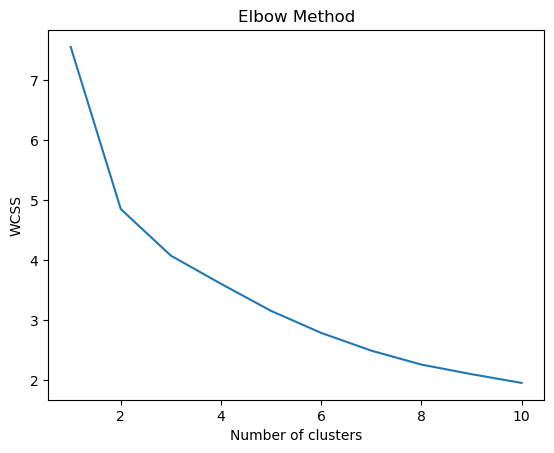

In [92]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(spd_data_T)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Silhouette Coefficient

In [94]:
# 为聚类结果保存轮廓系数
silhouette_scores = []

# 选择聚类数从2到10
for n_clusters in range(2, 11):
    # 计算KMeans聚类
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(spd_data_T)

    # 计算轮廓系数
    silhouette_avg = silhouette_score(spd_data_T, cluster_labels)

    # 将轮廓系数保存到列表中
    silhouette_scores.append(silhouette_avg)

# 找到具有最大轮廓系数的聚类数
best_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

print("Best number of clusters:", best_n_clusters)


/opt/anaconda3/envs/ForEXE/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/ForEXE/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/ForEXE/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/ForEXE/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt

Best number of clusters: 2


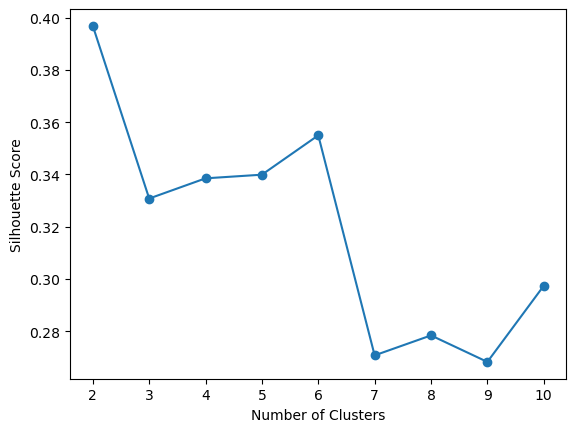

In [95]:
plt.plot(range(2,11), silhouette_scores, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


kmeans

In [96]:
n_clusters = 2  # 通过肘部法则或轮廓系数法确定的最佳聚类数

kmeans = KMeans(n_clusters=n_clusters)  # 初始化KMeans模型
kmeans.fit(spd_data_T)  # 对数据集进行聚类

cluster_labels = kmeans.labels_  # 获取每个样本所属簇的标签


/opt/anaconda3/envs/ForEXE/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [97]:
cluster_labels.shape

(1494,)

In [69]:
spd_data.shape

(471, 1494)

In [100]:
n = 471
cluster_data1 = np.empty([0,n])
cluster_data2 = np.empty([0,n])

for i in cluster_labels:
    if i == 0:
        cluster_data1 = np.vstack([cluster_data1, spd_data_T[i]])
    if i == 1:
        cluster_data2 = np.vstack([cluster_data2, spd_data_T[i]])


In [101]:
print(cluster_data1.shape)
print(cluster_data2.shape)

(904, 471)
(590, 471)


In [35]:
cluster_dict = {}
cluster_dict['cluster1'] = cluster_data1
cluster_dict['cluster2'] = cluster_data2


In [ ]:
form PCAclass import SPDReconstruction